# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
city_data_df[:1]

,city,driver_count,type
0,Richardfort,38,Urban


In [5]:
pyber_data_df[:1]

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban


## Deliverable 1: Get a Summary DataFrame 

In [6]:
#  1. Get the total rides for each city type
# 2. Get the total drivers for each city type
#  3. Get the total amount of fares for each city type
#  4. Get the average fare per ride for each city type. 
# 5. Get the average fare per driver for each city type. 
#  6. Create a PyBer summary DataFrame. 
#  7. Cleaning up the DataFrame. Delete the index name
# pyber_summary_df.index.name = None
#  8. Format the columns.

In [7]:
pd.options.display.float_format = '${:,.2f}'.format

grp = pyber_data_df.groupby('type')
grp2 = city_data_df.groupby('type')

df = pd.DataFrame({
    'Total Rides': grp.ride_id.count().map(lambda x: f'{x:,}'),
    'Total Drivers': grp2.driver_count.sum().map(lambda x: f'{x:,}'),
    'Total Fares': grp.fare.sum(),
    'Average Fare per Ride': grp.fare.mean(),
    'Average Fare per Driver': grp.fare.sum()/grp2.driver_count.sum()
})

df.index.name = None
df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [8]:
# 1. Read the merged DataFrame
# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


In [17]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
grp = pyber_data_df.groupby(['type','date'])

df = pd.DataFrame({
    'Total Fares': grp.fare.sum()})
df.head()

Total Fares
type  date                            
Rural 2019-01-01 09:45:36       $43.69
      2019-01-02 11:18:32       $52.12
      2019-01-03 19:51:01       $19.90
      2019-01-04 03:31:26       $24.88
      2019-01-06 07:38:40       $47.33

In [18]:
# 3. Reset the index on the DataFrame you created in #1. 
# This is needed to use the 'pivot()' function.
# df = df.reset_index()

df = df.reset_index()
df

,type,date,Total Fares
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,$21.99
2371,Urban,2019-05-08 04:39:49,$18.45
2372,Urban,2019-05-08 07:29:01,$18.55
2373,Urban,2019-05-08 11:38:35,$19.77


In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df = pd.pivot_table(df,index='date',columns='type',values ='Total Fares')
df.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75


In [21]:
# 5. Create a new DataFrame from the pivot table DataFrame 
#using loc on the given dates, '2019-01-01':'2019-04-29'.

df= df.loc["2019-01-01":"2019-04-29"]
df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
2019-01-01 09:45:36,$43.69,NaN,NaN
2019-01-01 12:32:48,NaN,$25.56,NaN
2019-01-01 14:40:14,NaN,NaN,$5.42
2019-01-01 14:42:25,NaN,NaN,$12.31


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6+ KB


In [24]:
# 6. Set the "date" index to datetime datatype. This is necessary 
# to use the resample() method in Step 8.
df.index = pd.to_datetime(df.index)

In [25]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [30]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = df.resample('W').sum()
df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


In [ ]:
# 8. Using the object-oriented interface method, plot 
# the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

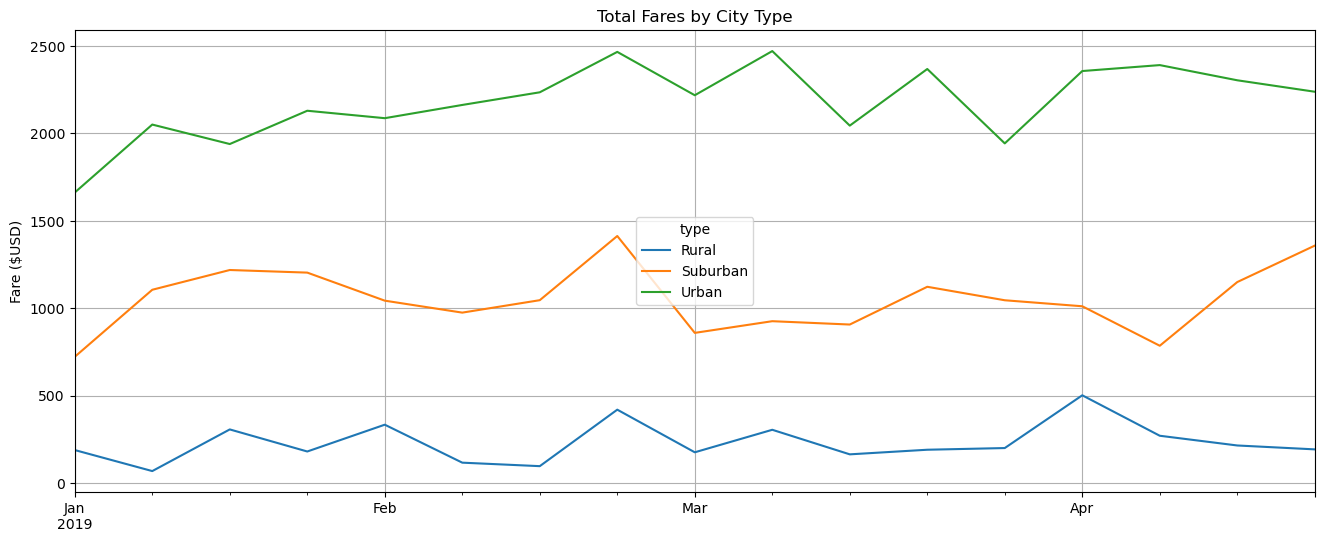

In [39]:
df.plot(figsize=(16,6),grid=True,title="Total Fares by City Type",ylabel="Fare ($USD)",xlabel="")
plt.show()